<a href="https://colab.research.google.com/github/dhenifferraujo/Machine-Learning/blob/main/ANN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Aqui eu importei a biblioteca tensorflow e dei um "apelido" para ela de 'tf'
import tensorflow as tf

In [ ]:
#Criação do modelo sequencial
#O modelo sequencial permite inserir camadas em série, onde o output da primeira camada serve como input da segunda, e assim por diante.
rede = tf.keras.models.Sequential()

In [ ]:
#Adicionando camadas densas (totalmente conectadas). A seguir estou colocando o endereço delas, assim como as suas características.
#Units são os neurônios, input_shape são as entradas, activation é a função de ativação.
#A função de ativação decide se um neurônio da camada é disparado ou não. 
rede.add(tf.keras.layers.Dense(units=10, input_shape=(4,),activation='sigmoid')) #Essa é a primeira camada
rede.add(tf.keras.layers.Dense(units=16, activation='sigmoid')) #Não precisei dizer quantas entradas essa segunda camada tem, porque ela já vai usar as 10 entradas da camada anterior automaticamente
rede.add(tf.keras.layers.Dense(units=3, activation='softmax')) #Terceira camada

In [ ]:
#Aprendizado de redes neurais
#A compilação serve para validar e finalizar a estrutura da rede neural. Ela recebe 3 parâmetros: loss, optmizer e metrics.
#Optimizer: define como os pesos da rede neural são atualizados.
#loss: calcula a diferença entre os dados de teste e os dados de validação.
#metrics: são as métricas que devem ser guardadas para avaliação. 
rede.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics='accuracy')

In [ ]:
#Treinamento, Resultados e Validação
#Coloquei o nome do meu banco de dados de 'banco'
from sklearn.datasets import load_iris
banco = load_iris()


In [ ]:
banco.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#Na 'data' eu posso ver as dimensões das flores
banco['data'] [37]

array([4.9, 3.6, 1.4, 0.1])

In [ ]:
#Para saber qual dimensão é cada
banco['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#Na key target posso encontrar qual flor está relacionada com as dimensões que encontro na key 'data'
banco['target'][37]

0

In [ ]:
#Na key target eu consigo descobrir qual é a ordem certa dos nomes
banco['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#Agora vou salvar os dados mais importantes: 'data' e 'target' em duas variáveis: o 'x' e o 'y', o x (banco) será a dimensão das flores vão ser os dados de entrada
#Já o 'y' que são os tipos de flores vão ser os dados de saída que eu quero atingir 
#Pode-se pensar no x como sendo as perguntas e o y como sendo as respostas
x = banco['data']
y = banco['target']

In [ ]:
#Se eu uso esse bloco todo para a rede estudar, não vai sobrar nenhuma pergunta para poder testar a rede, então para isso vou separar esse bloco em dois grupos:
#O primeira chamado de 'treino' (como se fosse o exercício) e o segundo de 'teste' (como se fosse a prova)

In [ ]:
#No sklearn existe uma função para separar o banco em duas partes: 'treino' e 'teste'. Essa função se chama 'train_test_split'
from sklearn.model_selection import train_test_split

In [ ]:
#Essa função terá 3 entradas: x, y, e test_size. A terceira vai determinar qual o tamanho do teste. Nesse caso o tamanho do teste é 20%
#Essa função têm quatro saídas: as perguntas do treino; as perguntas do teste; as respostas do treino e as respostas do teste. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
#Aqui é como se eu colocasse a rede sem estudar para fazer a prova, pra ver como ela se sai. Para isso vou usar a função 'evaluate'
#Com a métrica acurácia dá pra ver que ela só tá acertando pouco mais de 30% da prova, ou seja, ela está chutando as respostas.
rede.evaluate(x_test, y_test)

1/1 [==============================] - 0s 175ms/step - loss: 1.2157 - accuracy: 0.2333


[1.2157082557678223, 0.23333333432674408]

In [ ]:
#Na função anterior ficou claro que a rede precisa estudar, para isso vou dar para ela a 'lista de exercícios' (x_train e y_train), o número de vezes que ela irá fazer essa lista, 
#e por último irei dar o x_teste e y_test como forma de avaliação da rede
#A função fit retorna um histórico de métricas. Com isso posso verificar a precisão de nosso algoritmo
r = rede.fit(x_train, y_train, epochs = 150, validation_data=(x_test, y_test))

Epoch 1/150
4/4 [==============================] - 0s 34ms/step - loss: 1.1262 - accuracy: 0.3583 - val_loss: 1.1986 - val_accuracy: 0.2333
Epoch 2/150
4/4 [==============================] - 0s 18ms/step - loss: 1.1180 - accuracy: 0.3583 - val_loss: 1.1825 - val_accuracy: 0.2333
Epoch 3/150
4/4 [==============================] - 0s 16ms/step - loss: 1.1101 - accuracy: 0.3583 - val_loss: 1.1674 - val_accuracy: 0.2333
Epoch 4/150
4/4 [==============================] - 0s 19ms/step - loss: 1.1014 - accuracy: 0.3583 - val_loss: 1.1557 - val_accuracy: 0.2333
Epoch 5/150
4/4 [==============================] - 0s 16ms/step - loss: 1.0950 - accuracy: 0.3583 - val_loss: 1.1453 - val_accuracy: 0.2333
Epoch 6/150
4/4 [==============================] - 0s 17ms/step - loss: 1.0905 - accuracy: 0.3667 - val_loss: 1.1345 - val_accuracy: 0.2667
Epoch 7/150
4/4 [==============================] - 0s 16ms/step - loss: 1.0847 - accuracy: 0.3917 - val_loss: 1.1256 - val_accuracy: 0.4000
Epoch 8/150
4/4 [===

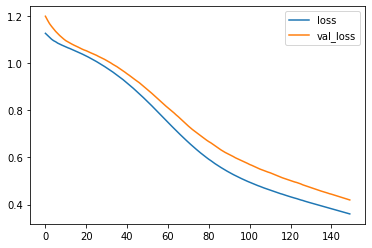

In [ ]:
#Em cada linha eu consigo ver duas acurácias, uma de treino e uma de teste
#Para visualizar a evolução, irei fazer dois gráficos, para isso vou utilizar uma biblioteca do python chamada 'matplotlib'
#A linha azul mostra a evolução do treino e a laranja a do teste em cada uma das iterações
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

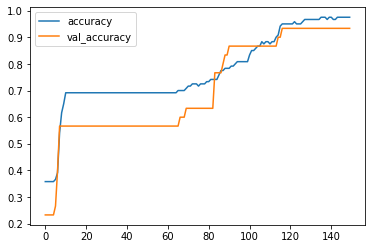

In [ ]:
#No segundo gráfico eu posso visualizar a evolução da acurácia nos testes e nas provas
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
#Imagina como se eu tivesse medido uma flor e colocado as medidas dela aqui
import numpy as np
rede.predict(np.array([[5.4,2.5,3.7,1.0]]))

array([[0.16427338, 0.5974211 , 0.23830552]], dtype=float32)